In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/22-1 modeling project/6th_merged_data.csv')

In [4]:
data_2.head(3)

,회사명,종목코드,업종,상장일,지역,영문 종목명,시장구분,상장주식수,ESG등급,환경,...,직무향상교육,리더십교육,해외연수지원,도서비지원,외국어교육지원,자격증취득지원,총개수,기준가&종가 평균,업종 대분류,온실가스/매출액
0,모아데이타,288980.0,소프트웨어 개발 및 공급업,2022-03-10,경기도,"Moadata Co., Ltd",KOSDAQ,5361.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,정보 통신 소프트웨어 및 공학연구,NaN
1,에스케이증권7호스팩,408920.0,금융 지원 서비스업,2022-03-07,서울특별시,SK Securities ACPC No.7 Special Purpose Acquis...,KOSDAQ,3620.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,금융,NaN
2,노을,376930.0,의료용 기기 제조업,2022-03-03,경기도,"Noul Co., Ltd.",KOSDAQ,10425.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,의료기기 의약품 제조업,NaN


## 업종 median으로 결측치 처리

In [5]:
data_ori = data_2.copy()

data_2['온실가스 배출량(tCO2-eq)'] = data_2['온실가스 배출량(tCO2-eq)'].fillna(data_2.groupby('업종')['온실가스 배출량(tCO2-eq)'].transform('median'))
data_2['에너지 사용량(TJ)'] = data_2['에너지 사용량(TJ)'].fillna(data_2.groupby('업종')['에너지 사용량(TJ)'].transform('median'))
data_2['자산총계'] = data_2['자산총계'].fillna(data_2.groupby('업종')['자산총계'].transform('median'))
data_2['총개수'] = data_2['총개수'].fillna(data_2.groupby('업종')['총개수'].transform('median'))
data_2['자본총계'] = data_2['자본총계'].fillna(data_2.groupby('업종')['자본총계'].transform('median'))
data_2['자본금'] = data_2['자본금'].fillna(data_2.groupby('업종')['자본금'].transform('median'))
data_2['매출액'] = data_2['매출액'].fillna(data_2.groupby('업종')['매출액'].transform('median'))
data_2['영업이익'] = data_2['영업이익'].fillna(data_2.groupby('업종')['영업이익'].transform('median'))
data_2['순이익'] = data_2['순이익'].fillna(data_2.groupby('업종')['순이익'].transform('median'))
data_2['시가총액'] = data_2['시가총액'].fillna(data_2.groupby('업종')['시가총액'].transform('median'))
data_2['온실가스/매출액'] = data_2['온실가스/매출액'].fillna(data_2.groupby('업종')['온실가스/매출액'].transform('median'))
data_2['기준가&종가 평균'] = data_2['기준가&종가 평균'].fillna(data_2.groupby('업종')['기준가&종가 평균'].transform('median'))

## 남은 결측치 업종 대분류 median으로 처리

In [6]:
data_2['온실가스 배출량(tCO2-eq)'] = data_2['온실가스 배출량(tCO2-eq)'].fillna(data_2.groupby('업종 대분류')['온실가스 배출량(tCO2-eq)'].transform('median'))
data_2['에너지 사용량(TJ)'] = data_2['에너지 사용량(TJ)'].fillna(data_2.groupby('업종 대분류')['에너지 사용량(TJ)'].transform('median'))
data_2['자산총계'] = data_2['자산총계'].fillna(data_2.groupby('업종 대분류')['자산총계'].transform('median'))
data_2['총개수'] = data_2['총개수'].fillna(data_2.groupby('업종 대분류')['총개수'].transform('median'))
data_2['자본총계'] = data_2['자본총계'].fillna(data_2.groupby('업종 대분류')['자본총계'].transform('median'))
data_2['자본금'] = data_2['자본금'].fillna(data_2.groupby('업종 대분류')['자본금'].transform('median'))
data_2['매출액'] = data_2['매출액'].fillna(data_2.groupby('업종 대분류')['매출액'].transform('median'))
data_2['영업이익'] = data_2['영업이익'].fillna(data_2.groupby('업종 대분류')['영업이익'].transform('median'))
data_2['순이익'] = data_2['순이익'].fillna(data_2.groupby('업종 대분류')['순이익'].transform('median'))
data_2['시가총액'] = data_2['시가총액'].fillna(data_2.groupby('업종 대분류')['시가총액'].transform('median'))
data_2['온실가스/매출액'] = data_2['온실가스/매출액'].fillna(data_2.groupby('업종 대분류')['온실가스/매출액'].transform('median'))
data_2['기준가&종가 평균'] = data_2['기준가&종가 평균'].fillna(data_2.groupby('업종 대분류')['기준가&종가 평균'].transform('median'))

In [7]:
data_2.head()

,회사명,종목코드,업종,상장일,지역,영문 종목명,시장구분,상장주식수,ESG등급,환경,...,직무향상교육,리더십교육,해외연수지원,도서비지원,외국어교육지원,자격증취득지원,총개수,기준가&종가 평균,업종 대분류,온실가스/매출액
0,모아데이타,288980.0,소프트웨어 개발 및 공급업,2022-03-10,경기도,"Moadata Co., Ltd",KOSDAQ,5361.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9140.00,정보 통신 소프트웨어 및 공학연구,0.00000
1,에스케이증권7호스팩,408920.0,금융 지원 서비스업,2022-03-07,서울특별시,SK Securities ACPC No.7 Special Purpose Acquis...,KOSDAQ,3620.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2186.25,금융,0.00000
2,노을,376930.0,의료용 기기 제조업,2022-03-03,경기도,"Noul Co., Ltd.",KOSDAQ,10425.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,9882.25,의료기기 의약품 제조업,0.00000
3,비씨엔씨,146320.0,반도체 제조업,2022-03-03,경기도,"BCnC Co., Ltd.",KOSDAQ,12368.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5275.00,전자부품 및 반도체 제조,0.02904
4,풍원정밀,371950.0,전자부품 제조업,2022-02-28,경기도,"POONGWON PRECISION Co.,Ltd.",KOSDAQ,21040.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8305.00,전자부품 및 반도체 제조,0.00000


In [8]:
float_columns = data_2.select_dtypes("float64").columns
float_df = data_2[float_columns]

object_columns = data_2.select_dtypes("object").columns
object_df = data_2[object_columns]
object_df = object_df.fillna('N')

In [9]:
# 결측치 -> 평균값 & 'N' 처리 완료한 데이터셋
data_3 = pd.concat([object_df, float_df], axis = 1)

In [10]:
data_3.columns

Index(['회사명', '업종', '상장일', '지역', '영문 종목명', '시장구분', 'ESG등급', '환경', '사회', '지배구조',
       'stock_name', 'corp_cls', '업종 대분류', '종목코드', '상장주식수', '등락률', '거래량_x',
       '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', 'corp_code',
       'induty_code', 'est_dt', '2021년 NCSI', '자산총계', '자본금', '자본총계', '매출액',
       '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '통근버스운행', '본인학자금',
       '복지카드', '업무활동비', '자격증수당', '위험수당', '사대보험', '워크샵', '신입사원교육', '직무향상교육',
       '리더십교육', '해외연수지원', '도서비지원', '외국어교육지원', '자격증취득지원', '총개수', '기준가&종가 평균',
       '온실가스/매출액'],
      dtype='object')

In [11]:
# ESG 평가 받은 기업만
data_4 = data_3[data_3['ESG등급'] != 'N']
data_4.reset_index(inplace=True)

In [12]:
data_4.columns

Index(['index', '회사명', '업종', '상장일', '지역', '영문 종목명', '시장구분', 'ESG등급', '환경',
       '사회', '지배구조', 'stock_name', 'corp_cls', '업종 대분류', '종목코드', '상장주식수',
       '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       'corp_code', 'induty_code', 'est_dt', '2021년 NCSI', '자산총계', '자본금',
       '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '통근버스운행',
       '본인학자금', '복지카드', '업무활동비', '자격증수당', '위험수당', '사대보험', '워크샵', '신입사원교육',
       '직무향상교육', '리더십교육', '해외연수지원', '도서비지원', '외국어교육지원', '자격증취득지원', '총개수',
       '기준가&종가 평균', '온실가스/매출액'],
      dtype='object')

In [13]:
data_4['상장일']

0      2021-08-09
1      2021-07-06
2      2019-12-19
3      2019-11-29
4      2019-11-25
          ...    
950    1956-07-02
951    1956-07-02
952    1956-03-03
953    1956-03-03
954    1956-03-03
Name: 상장일, Length: 955, dtype: object

In [14]:
from datetime import datetime
date_diff_list = [] 

for i in range(len(data_4['상장일'])):
  now  = datetime.now()
  now = datetime.strptime(str(now)[0:10], "%Y-%m-%d")
  date_to_compare = datetime.strptime(str(data_4['상장일'][i])[0:10], "%Y-%m-%d")
  date_diff = now - date_to_compare
  date_diff = str(date_diff)[:-14]
  date_diff_list.append(date_diff)

In [15]:
date_diff_df = pd.DataFrame(date_diff_list)
date_diff_df.columns = ['상장기간']
data_4 = pd.concat([data_4, date_diff_df], axis = 1)

In [16]:
data_4.head(1)

,index,회사명,업종,상장일,지역,영문 종목명,시장구분,ESG등급,환경,사회,...,직무향상교육,리더십교육,해외연수지원,도서비지원,외국어교육지원,자격증취득지원,총개수,기준가&종가 평균,온실가스/매출액,상장기간
0,89,PI첨단소재,플라스틱제품 제조업,2021-08-09,충청북도,"PI Advanced Materials Co., Ltd.",KOSPI,B+,B+,B,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42200.0,0.285074,238


In [17]:
# column 선택
# 종목 코드 & 2021년 NCSI(결측치 너무 많아) 제외
data_4 = data_4[['회사명', '업종', '상장일', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조',
       '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익',
       '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액',
       '총개수','상장기간']]
data_4_x = data_4[['회사명', '업종', '상장일', '지역', '시장구분','상장주식수', 
        '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익',
       '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액',
       '총개수','상장기간']]
data_4_y = data_4[['ESG등급', '환경', '사회', '지배구조']]
data_4.columns

Index(['회사명', '업종', '상장일', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조', '상장주식수',
       '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', '자산총계',
       '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y',
       '기준가&종가 평균', '온실가스/매출액', '총개수', '상장기간'],
      dtype='object')

# 카테고리 문자열 데이터 수치화 (인코딩 방법) 

## 레이블 인코딩 사용 

https://lovelydiary.tistory.com/419

In [18]:
pip install kmodes

In [19]:
import numpy as np
from sklearn import datasets
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [20]:
'''kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
data_5 = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조', '종목코드',
       '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
        '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액',
       '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '총개수', '상장기간']]

kp.fit_predict(data_5, categorical=[0,1,2,3,4,5,6,7,8])

                                    # 9,10,11,12,13,14,15,16,17,18])'''

"kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)\ndata_5 = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조', '종목코드',\n       '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',\n        '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액',\n       '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '총개수', '상장기간']]\n\nkp.fit_predict(data_5, categorical=[0,1,2,3,4,5,6,7,8])\n\n                                    # 9,10,11,12,13,14,15,16,17,18])"

In [21]:
data_4_object = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조']]

In [22]:
data_4_float = data_4[['상장주식수', '등락률', '거래량_x', '거래대금_x',
       '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계',
       '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균',
       '온실가스/매출액','상장기간','총개수']]

In [23]:
# 라벨 인코딩 - 
from sklearn.preprocessing import LabelEncoder
LEdf = pd.DataFrame()
for col in data_4_object.columns:
  le = LabelEncoder()
  le.fit(data_4_object[col])
  LEdf[col] = le.transform(data_4_object[col])

In [24]:
data_4_object2 = LEdf
data_4_object2

,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,94,126,16,1,3,3,2,3
1,554,79,8,1,4,4,2,2
2,321,100,8,0,4,5,4,3
3,719,67,8,0,2,5,4,3
4,452,97,10,1,2,5,2,3
...,...,...,...,...,...,...,...,...
950,10,46,8,1,0,0,1,0
951,326,53,8,1,2,5,3,3
952,141,111,8,1,4,4,4,3
953,605,132,8,1,3,5,2,0


In [25]:
data_4_object

,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,PI첨단소재,플라스틱제품 제조업,충청북도,KOSPI,B+,B+,B,B+
1,엠씨넥스,영상 및 음향기기 제조업,서울특별시,KOSPI,C,C,B,B
2,메드팩토,자연과학 및 공학 연구개발업,서울특별시,KOSDAQ,C,D,C,B+
3,코리아센터,소프트웨어 개발 및 공급업,서울특별시,KOSDAQ,B,D,C,B+
4,센트랄모텍,자동차 신품 부품 제조업,울산광역시,KOSPI,B,D,B,B+
...,...,...,...,...,...,...,...,...
950,CJ대한통운,도로 화물 운송업,서울특별시,KOSPI,A,A,A+,A
951,메리츠화재,보험업,서울특별시,KOSPI,B,D,B+,B+
952,경방,종합 소매업,서울특별시,KOSPI,C,C,C,B+
953,유수홀딩스,회사 본부 및 경영 컨설팅 서비스업,서울특별시,KOSPI,B+,D,B,A


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_4_float_std  = scaler.fit_transform(data_4_float)

# 시각화 위해 데이터프레임으로 변환
data_4_float = pd.DataFrame(data_4_float_std, columns=data_4_float.columns, index=list(data_4_float.index.values))

In [27]:
data_4_float.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,영업이익,순이익,종가,시가총액,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,총개수
0,0.004819,0.190183,0.003631,0.010860,0.001123,0.003644,0.001170,0.003109,0.001530,0.001511,0.053725,0.059181,0.049374,0.003360,0.005959,0.009753,0.034683,0.026214,0.000000,0.000000
1,0.002911,0.129244,0.003134,0.009055,0.001034,0.004015,0.001227,0.001797,0.001526,0.004093,0.052008,0.058045,0.051458,0.002123,0.009762,0.016548,0.038411,0.000000,0.001423,0.000000
2,0.003397,0.055074,0.003400,0.012056,0.000294,0.001199,0.000247,0.002090,0.000069,0.000000,0.050605,0.056714,0.053451,0.002529,0.008073,0.013962,0.047626,0.000000,0.025063,0.076923
3,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.001460,0.000920,0.000390,0.051683,0.057421,0.005866,0.001030,0.004480,0.000905,0.005735,0.000000,0.025900,0.230769
4,0.001342,0.089947,0.003003,0.004951,0.000266,0.001020,0.004631,0.009742,0.005324,0.007238,0.053201,0.058792,0.020290,0.000343,0.001007,0.000680,0.019171,0.002162,0.026067,0.230769


ESG 라벨링 기준
- A  = 0 
- A+ = 1
- B  = 2 
- B+ = 3
- C  = 4 
- D  = 5

In [28]:
data_4 = pd.concat([data_4_float, data_4_object2], axis = 1)
data_4.head(2)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,상장기간,총개수,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,0.004819,0.190183,0.003631,0.010860,0.001123,0.003644,0.001170,0.003109,0.001530,0.001511,...,0.000000,0.0,94,126,16,1,3,3,2,3
1,0.002911,0.129244,0.003134,0.009055,0.001034,0.004015,0.001227,0.001797,0.001526,0.004093,...,0.001423,0.0,554,79,8,1,4,4,2,2


# 오버샘플링

https://blog.naver.com/PostView.naver?blogId=gh03014&logNo=222309000768&parentCategoryNo=&categoryNo=8&viewDate=&isShowPopularPosts=true&from=search

https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html 
- 여러가지 imblanced 데이터 문제 해결 방법 소개
- 현재 문제: 카테고리 데이터 오버샘플링 불가

In [29]:
pip install imblearn

In [30]:
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 3)

In [31]:
data_4.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', 'ESG등급', '환경', '사회', '지배구조'],
      dtype='object')

In [32]:
data_4 = data_4.fillna(0)
data_4_X = data_4[['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조']]
data_4_Y = data_4[['ESG등급']]      

In [33]:
data_4_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 954
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장주식수              955 non-null    float64
 1   등락률                955 non-null    float64
 2   거래량_x              955 non-null    float64
 3   거래대금_x             955 non-null    float64
 4   온실가스 배출량(tCO2-eq)  955 non-null    float64
 5   에너지 사용량(TJ)        955 non-null    float64
 6   자산총계               955 non-null    float64
 7   자본금                955 non-null    float64
 8   자본총계               955 non-null    float64
 9   매출액                955 non-null    float64
 10  영업이익               955 non-null    float64
 11  순이익                955 non-null    float64
 12  종가                 955 non-null    float64
 13  시가총액               955 non-null    float64
 14  거래량_y              955 non-null    float64
 15  거래대금_y             955 non-null    float64
 16  기준가&종가 평균          955 non

In [34]:
import os
import sklearn
o_X, o_y = oversampling_instance.fit_resample(data_4_X, data_4_Y)

In [35]:
o_y.value_counts()

ESG등급
0        301
1        301
2        301
3        301
4        301
5        301
dtype: int64

In [36]:
o_X.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조'],
      dtype='object')

In [37]:
oversp = pd.concat([o_X, o_y], axis=1)

# train test split

In [38]:
# train test set 분리
from sklearn.model_selection import train_test_split
train_x, test_y, train_y, test_y = train_test_split(o_X, o_y, test_size=0.33, random_state=321)
train, test = train_test_split(oversp, test_size=0.33, random_state=1000)


# 클러스터링

In [39]:
oversp.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조', 'ESG등급'],
      dtype='object')

In [40]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
kp.fit_predict(oversp, categorical=[20,21,22,23,24,25,26,27])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 657, ncost: 719.5695875470685
Run: 1, iteration: 2/100, moves: 309, ncost: 709.1251857086612
Run: 1, iteration: 3/100, moves: 275, ncost: 699.2752625594879
Run: 1, iteration: 4/100, moves: 108, ncost: 698.6664400829766
Run: 1, iteration: 5/100, moves: 17, ncost: 698.5533201116076
Run: 1, iteration: 6/100, moves: 23, ncost: 698.3622442018595
Run: 1, iteration: 7/100, moves: 9, ncost: 698.3419715516648
Run: 1, iteration: 8/100, moves: 2, ncost: 698.340304847883
Run: 1, iteration: 9/100, moves: 0, ncost: 698.340304847883


array([2, 2, 0, ..., 0, 0, 0], dtype=uint16)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
np_arr = np.concatenate((oversp, kp.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
df = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster"]) # 마지막 column name is cluster

df[['ESG등급', '환경', '사회', '지배구조',"cluster"]] = df[['ESG등급', '환경', '사회', '지배구조',"cluster"]].astype(object)
px.scatter(df , x="매출액",y="자산총계",color="ESG등급",symbol="cluster",width=700,height=700)

In [42]:
df.groupby('cluster')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster,cluster별 최빈값,cluster별 데이터 수
0,0.0,5.0,352
1,1.0,1.0,384
2,2.0,3.0,292
3,3.0,4.0,306
4,4.0,2.0,219
5,5.0,3.0,253


In [43]:
cluster_0 = df[df['cluster'] == 0.0]
cluster_1 = df[df['cluster'] == 1.0]
cluster_2 = df[df['cluster'] == 2.0]
cluster_3 = df[df['cluster'] == 3.0]
cluster_4 = df[df['cluster'] == 4.0]
cluster_5 = df[df['cluster'] == 5.0]

### ESG 등급

In [44]:
print('1: \n',cluster_0['ESG등급'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_1['ESG등급'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_2['ESG등급'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3['ESG등급'].value_counts(normalize=True))  # n=3 or n=4
print('5: \n',cluster_4['ESG등급'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5['ESG등급'].value_counts(normalize=True))  # n=2

1: 
 5.0    0.741477
4.0    0.147727
2.0    0.079545
0.0    0.019886
3.0    0.011364
Name: ESG등급, dtype: float64
2: 
 1.0    0.783854
0.0    0.190104
3.0    0.023438
2.0    0.002604
Name: ESG등급, dtype: float64
3: 
 3.0    0.486301
0.0    0.328767
2.0    0.143836
4.0    0.037671
5.0    0.003425
Name: ESG등급, dtype: float64
4: 
 4.0    0.624183
2.0    0.218954
5.0    0.124183
0.0    0.029412
3.0    0.003268
Name: ESG등급, dtype: float64
5: 
 2.0    0.575342
4.0    0.173516
3.0    0.127854
0.0    0.118721
5.0    0.004566
Name: ESG등급, dtype: float64
6: 
 3.0    0.462451
0.0    0.355731
2.0    0.146245
4.0    0.035573
Name: ESG등급, dtype: float64


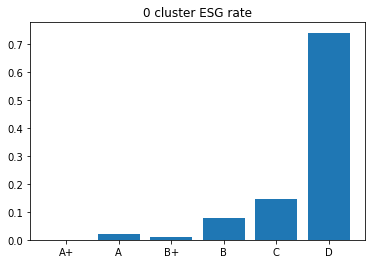

In [93]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['ESG등급']==1])/352,
               len(cluster_0[cluster_0['ESG등급']==0])/352,
               len(cluster_0[cluster_0['ESG등급']==3])/352,
               len(cluster_0[cluster_0['ESG등급']==2])/352,
               len(cluster_0[cluster_0['ESG등급']==4])/352,
               len(cluster_0[cluster_0['ESG등급']==5])/352]

plt.bar(group_names, values0)
plt.title("0 cluster ESG rate")

plt.savefig('esg0.png')
plt.show()

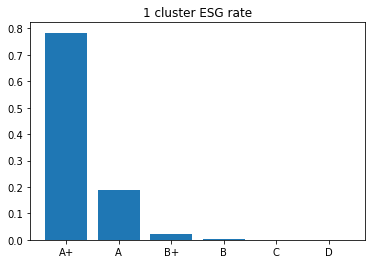

In [94]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values1 = [len(cluster_1[cluster_1['ESG등급']==1])/384,
               len(cluster_1[cluster_1['ESG등급']==0])/384,
               len(cluster_1[cluster_1['ESG등급']==3])/384,
               len(cluster_1[cluster_1['ESG등급']==2])/384,
               len(cluster_1[cluster_1['ESG등급']==4])/384,
               len(cluster_1[cluster_1['ESG등급']==5])/384]

plt.bar(group_names, values1)
plt.title("1 cluster ESG rate")

plt.savefig('esg1.png')
plt.show()


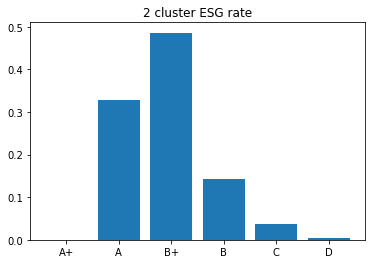

In [99]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values2 = [len(cluster_2[cluster_2['ESG등급']==1])/292,
               len(cluster_2[cluster_2['ESG등급']==0])/292,
               len(cluster_2[cluster_2['ESG등급']==3])/292,
               len(cluster_2[cluster_2['ESG등급']==2])/292,
               len(cluster_2[cluster_2['ESG등급']==4])/292,
               len(cluster_2[cluster_2['ESG등급']==5])/292]

plt.bar(group_names, values2)
plt.title("2 cluster ESG rate")

plt.savefig('esg2.png')
plt.show()

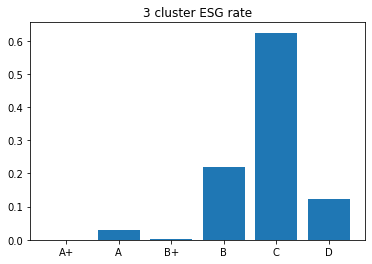

In [100]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values3 = [len(cluster_3[cluster_3['ESG등급']==1])/306,
               len(cluster_3[cluster_3['ESG등급']==0])/306,
               len(cluster_3[cluster_3['ESG등급']==3])/306,
               len(cluster_3[cluster_3['ESG등급']==2])/306,
               len(cluster_3[cluster_3['ESG등급']==4])/306,
               len(cluster_3[cluster_3['ESG등급']==5])/306]

plt.bar(group_names, values3)
plt.title("3 cluster ESG rate")

plt.savefig('esg3.png')
plt.show()

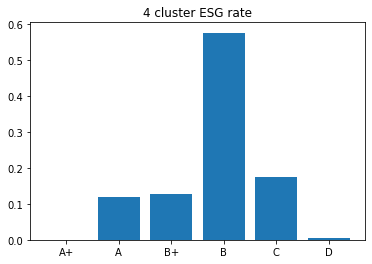

In [101]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values4 = [len(cluster_4[cluster_4['ESG등급']==1])/219,
               len(cluster_4[cluster_4['ESG등급']==0])/219,
               len(cluster_4[cluster_4['ESG등급']==3])/219,
               len(cluster_4[cluster_4['ESG등급']==2])/219,
               len(cluster_4[cluster_4['ESG등급']==4])/219,
               len(cluster_4[cluster_4['ESG등급']==5])/219]

plt.bar(group_names, values4)
plt.title("4 cluster ESG rate")

plt.savefig('esg4.png')
plt.show()

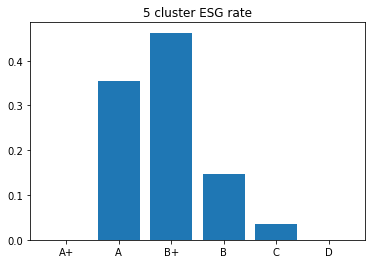

In [102]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values5 = [len(cluster_5[cluster_5['ESG등급']==1])/253,
               len(cluster_5[cluster_5['ESG등급']==0])/253,
               len(cluster_5[cluster_5['ESG등급']==3])/253,
               len(cluster_5[cluster_5['ESG등급']==2])/253,
               len(cluster_5[cluster_5['ESG등급']==4])/253,
               len(cluster_5[cluster_5['ESG등급']==5])/253]

plt.bar(group_names, values5)
plt.title("5 cluster ESG rate")

plt.savefig('esg5.png')
plt.show()

### 환경

In [123]:
print('1: \n',cluster_0['환경'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_1['환경'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_2['환경'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3['환경'].value_counts(normalize=True))  # n=3 or n=4
print('5: \n',cluster_4['환경'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5['환경'].value_counts(normalize=True))  # n=2

1: 
 5.0    0.838068
2.0    0.062500
4.0    0.051136
3.0    0.031250
0.0    0.011364
1.0    0.005682
Name: 환경, dtype: float64
2: 
 0.0    0.674479
1.0    0.302083
2.0    0.013021
3.0    0.010417
Name: 환경, dtype: float64
3: 
 2.0    0.441781
3.0    0.208904
0.0    0.167808
5.0    0.075342
4.0    0.071918
1.0    0.034247
Name: 환경, dtype: float64
4: 
 5.0    0.575163
4.0    0.245098
2.0    0.130719
0.0    0.026144
3.0    0.022876
Name: 환경, dtype: float64
5: 
 4.0    0.351598
5.0    0.255708
2.0    0.223744
0.0    0.077626
3.0    0.077626
1.0    0.013699
Name: 환경, dtype: float64
6: 
 3.0    0.383399
2.0    0.260870
0.0    0.177866
4.0    0.094862
5.0    0.047431
1.0    0.035573
Name: 환경, dtype: float64


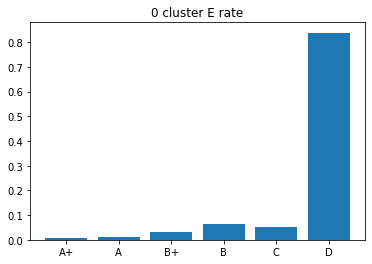

In [104]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['환경']==1])/352,
               len(cluster_0[cluster_0['환경']==0])/352,
               len(cluster_0[cluster_0['환경']==3])/352,
               len(cluster_0[cluster_0['환경']==2])/352,
               len(cluster_0[cluster_0['환경']==4])/352,
               len(cluster_0[cluster_0['환경']==5])/352]

plt.bar(group_names, values0)
plt.title("0 cluster E rate")

plt.savefig('e0.png')
plt.show()

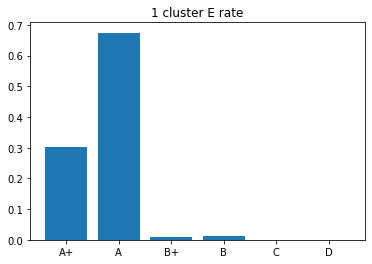

In [105]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_1[cluster_1['환경']==1])/384,
               len(cluster_1[cluster_1['환경']==0])/384,
               len(cluster_1[cluster_1['환경']==3])/384,
               len(cluster_1[cluster_1['환경']==2])/384,
               len(cluster_1[cluster_1['환경']==4])/384,
               len(cluster_1[cluster_1['환경']==5])/384]

plt.bar(group_names, values0)
plt.title("1 cluster E rate")

plt.savefig('e1.png')

plt.show()

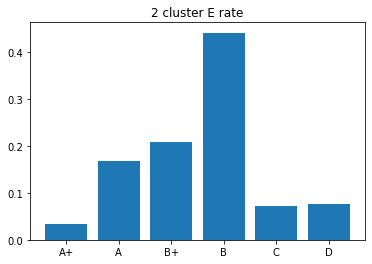

In [106]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_2[cluster_2['환경']==1])/292,
               len(cluster_2[cluster_2['환경']==0])/292,
               len(cluster_2[cluster_2['환경']==3])/292,
               len(cluster_2[cluster_2['환경']==2])/292,
               len(cluster_2[cluster_2['환경']==4])/292,
               len(cluster_2[cluster_2['환경']==5])/292]

plt.bar(group_names, values0)
plt.title("2 cluster E rate")

plt.savefig('e2.png')

plt.show()

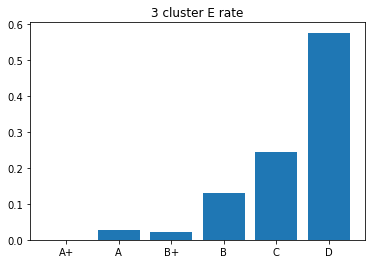

In [107]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_3[cluster_3['환경']==1])/306,
               len(cluster_3[cluster_3['환경']==0])/306,
               len(cluster_3[cluster_3['환경']==3])/306,
               len(cluster_3[cluster_3['환경']==2])/306,
               len(cluster_3[cluster_3['환경']==4])/306,
               len(cluster_3[cluster_3['환경']==5])/306]

plt.bar(group_names, values0)
plt.title("3 cluster E rate")

plt.savefig('e3.png')

plt.show()

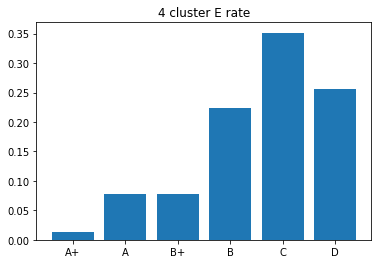

In [108]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_4[cluster_4['환경']==1])/219,
               len(cluster_4[cluster_4['환경']==0])/219,
               len(cluster_4[cluster_4['환경']==3])/219,
               len(cluster_4[cluster_4['환경']==2])/219,
               len(cluster_4[cluster_4['환경']==4])/219,
               len(cluster_4[cluster_4['환경']==5])/219]

plt.bar(group_names, values0)
plt.title("4 cluster E rate")

plt.savefig('e4.png')

plt.show()

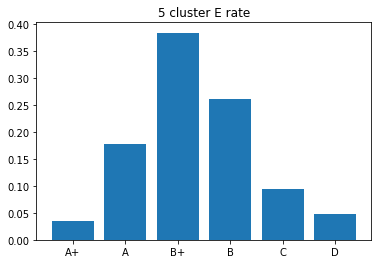

In [109]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_5[cluster_5['환경']==1])/253,
               len(cluster_5[cluster_5['환경']==0])/253,
               len(cluster_5[cluster_5['환경']==3])/253,
               len(cluster_5[cluster_5['환경']==2])/253,
               len(cluster_5[cluster_5['환경']==4])/253,
               len(cluster_5[cluster_5['환경']==5])/253]

plt.bar(group_names, values0)
plt.title("5 cluster E rate")

plt.savefig('e5.png')

plt.show()

### 사회

In [124]:
print('1: \n',cluster_0['사회'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_1['사회'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_2['사회'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3['사회'].value_counts(normalize=True))  # n=3 or n=4
print('5: \n',cluster_4['사회'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5['사회'].value_counts(normalize=True))  # n=2

1: 
 4.0    0.829545
2.0    0.073864
3.0    0.036932
5.0    0.036932
1.0    0.017045
0.0    0.005682
Name: 사회, dtype: float64
2: 
 1.0    0.877604
0.0    0.083333
2.0    0.031250
3.0    0.005208
4.0    0.002604
Name: 사회, dtype: float64
3: 
 0.0    0.397260
3.0    0.243151
1.0    0.171233
2.0    0.106164
4.0    0.065068
5.0    0.017123
Name: 사회, dtype: float64
4: 
 4.0    0.656863
2.0    0.183007
5.0    0.068627
3.0    0.062092
1.0    0.029412
Name: 사회, dtype: float64
5: 
 2.0    0.461187
4.0    0.210046
3.0    0.155251
1.0    0.118721
0.0    0.036530
5.0    0.018265
Name: 사회, dtype: float64
6: 
 0.0    0.383399
1.0    0.241107
3.0    0.150198
2.0    0.146245
4.0    0.059289
5.0    0.019763
Name: 사회, dtype: float64


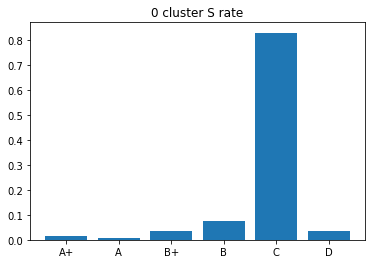

In [112]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['사회']==1])/352,
               len(cluster_0[cluster_0['사회']==0])/352,
               len(cluster_0[cluster_0['사회']==3])/352,
               len(cluster_0[cluster_0['사회']==2])/352,
               len(cluster_0[cluster_0['사회']==4])/352,
               len(cluster_0[cluster_0['사회']==5])/352]

plt.bar(group_names, values0)
plt.title("0 cluster S rate")

plt.savefig('s0.png')

plt.show()

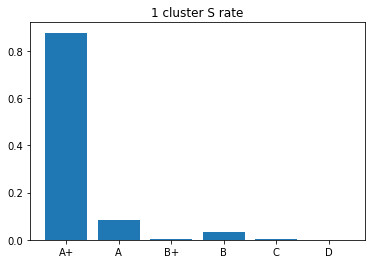

In [111]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_1[cluster_1['사회']==1])/384,
               len(cluster_1[cluster_1['사회']==0])/384,
               len(cluster_1[cluster_1['사회']==3])/384,
               len(cluster_1[cluster_1['사회']==2])/384,
               len(cluster_1[cluster_1['사회']==4])/384,
               len(cluster_1[cluster_1['사회']==5])/384]

plt.bar(group_names, values0)
plt.title("1 cluster S rate")

plt.savefig('s1.png')

plt.show()

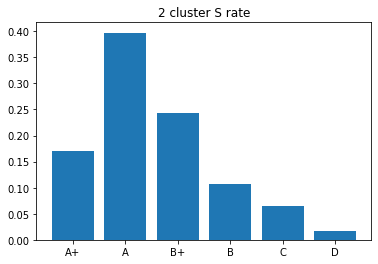

In [113]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_2[cluster_2['사회']==1])/292,
               len(cluster_2[cluster_2['사회']==0])/292,
               len(cluster_2[cluster_2['사회']==3])/292,
               len(cluster_2[cluster_2['사회']==2])/292,
               len(cluster_2[cluster_2['사회']==4])/292,
               len(cluster_2[cluster_2['사회']==5])/292]

plt.bar(group_names, values0)
plt.title("2 cluster S rate")

plt.savefig('s2.png')

plt.show()

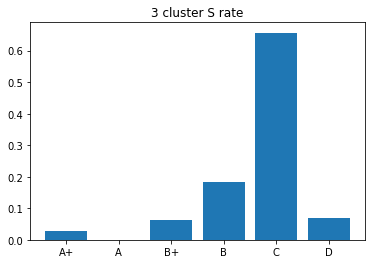

In [114]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_3[cluster_3['사회']==1])/306,
               len(cluster_3[cluster_3['사회']==0])/306,
               len(cluster_3[cluster_3['사회']==3])/306,
               len(cluster_3[cluster_3['사회']==2])/306,
               len(cluster_3[cluster_3['사회']==4])/306,
               len(cluster_3[cluster_3['사회']==5])/306]

plt.bar(group_names, values0)
plt.title("3 cluster S rate")

plt.savefig('s3.png')

plt.show()

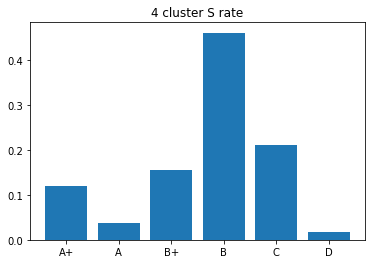

In [115]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_4[cluster_4['사회']==1])/219,
               len(cluster_4[cluster_4['사회']==0])/219,
               len(cluster_4[cluster_4['사회']==3])/219,
               len(cluster_4[cluster_4['사회']==2])/219,
               len(cluster_4[cluster_4['사회']==4])/219,
               len(cluster_4[cluster_4['사회']==5])/219]

plt.bar(group_names, values0)
plt.title("4 cluster S rate")

plt.savefig('s4.png')

plt.show()

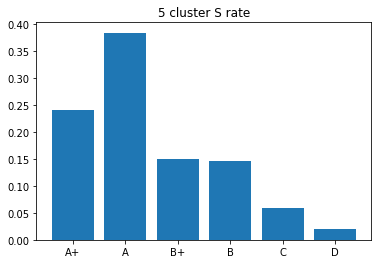

In [116]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_5[cluster_5['사회']==1])/253,
               len(cluster_5[cluster_5['사회']==0])/253,
               len(cluster_5[cluster_5['사회']==3])/253,
               len(cluster_5[cluster_5['사회']==2])/253,
               len(cluster_5[cluster_5['사회']==4])/253,
               len(cluster_5[cluster_5['사회']==5])/253]

plt.bar(group_names, values0)
plt.title("5 cluster S rate")

plt.savefig('s5.png')

plt.show()

### 지배구조

In [125]:
print('1: \n',cluster_0['지배구조'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_1['지배구조'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_2['지배구조'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3['지배구조'].value_counts(normalize=True))  # n=3 or n=4
print('5: \n',cluster_4['지배구조'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5['지배구조'].value_counts(normalize=True))  # n=2

1: 
 4.0    0.522727
5.0    0.301136
2.0    0.076705
3.0    0.071023
0.0    0.028409
Name: 지배구조, dtype: float64
2: 
 1.0    0.567708
0.0    0.385417
2.0    0.026042
3.0    0.020833
Name: 지배구조, dtype: float64
3: 
 3.0    0.496575
0.0    0.342466
2.0    0.130137
1.0    0.017123
5.0    0.010274
4.0    0.003425
Name: 지배구조, dtype: float64
4: 
 2.0    0.591503
4.0    0.186275
3.0    0.166667
5.0    0.035948
0.0    0.019608
Name: 지배구조, dtype: float64
5: 
 3.0    0.616438
2.0    0.214612
0.0    0.127854
4.0    0.031963
5.0    0.009132
Name: 지배구조, dtype: float64
6: 
 3.0    0.517787
0.0    0.296443
2.0    0.154150
1.0    0.031621
Name: 지배구조, dtype: float64


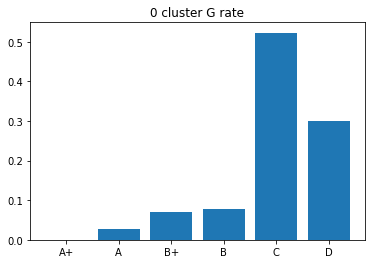

In [117]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['지배구조']==1])/352,
               len(cluster_0[cluster_0['지배구조']==0])/352,
               len(cluster_0[cluster_0['지배구조']==3])/352,
               len(cluster_0[cluster_0['지배구조']==2])/352,
               len(cluster_0[cluster_0['지배구조']==4])/352,
               len(cluster_0[cluster_0['지배구조']==5])/352]

plt.bar(group_names, values0)
plt.title("0 cluster G rate")

plt.savefig('g0.png')

plt.show()

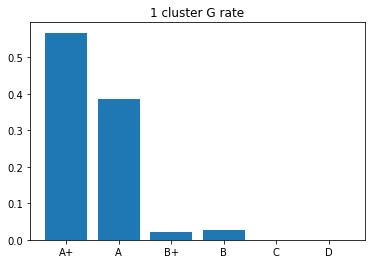

In [118]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_1[cluster_1['지배구조']==1])/384,
               len(cluster_1[cluster_1['지배구조']==0])/384,
               len(cluster_1[cluster_1['지배구조']==3])/384,
               len(cluster_1[cluster_1['지배구조']==2])/384,
               len(cluster_1[cluster_1['지배구조']==4])/384,
               len(cluster_1[cluster_1['지배구조']==5])/384]

plt.bar(group_names, values0)
plt.title("1 cluster G rate")

plt.savefig('g1.png')

plt.show()

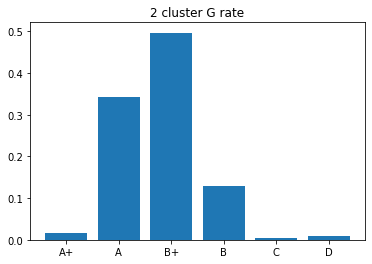

In [119]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_2[cluster_2['지배구조']==1])/292,
               len(cluster_2[cluster_2['지배구조']==0])/292,
               len(cluster_2[cluster_2['지배구조']==3])/292,
               len(cluster_2[cluster_2['지배구조']==2])/292,
               len(cluster_2[cluster_2['지배구조']==4])/292,
               len(cluster_2[cluster_2['지배구조']==5])/292]

plt.bar(group_names, values0)
plt.title("2 cluster G rate")

plt.savefig('g2.png')

plt.show()

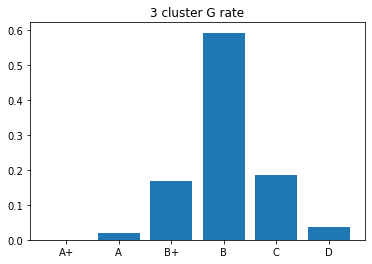

In [120]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_3[cluster_3['지배구조']==1])/306,
               len(cluster_3[cluster_3['지배구조']==0])/306,
               len(cluster_3[cluster_3['지배구조']==3])/306,
               len(cluster_3[cluster_3['지배구조']==2])/306,
               len(cluster_3[cluster_3['지배구조']==4])/306,
               len(cluster_3[cluster_3['지배구조']==5])/306]

plt.bar(group_names, values0)
plt.title("3 cluster G rate")

plt.savefig('g3.png')

plt.show()

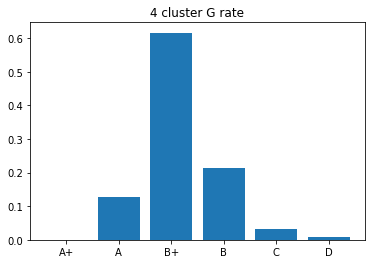

In [121]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_4[cluster_4['지배구조']==1])/219,
               len(cluster_4[cluster_4['지배구조']==0])/219,
               len(cluster_4[cluster_4['지배구조']==3])/219,
               len(cluster_4[cluster_4['지배구조']==2])/219,
               len(cluster_4[cluster_4['지배구조']==4])/219,
               len(cluster_4[cluster_4['지배구조']==5])/219]

plt.bar(group_names, values0)
plt.title("4 cluster G rate")

plt.savefig('g4.png')

plt.show()

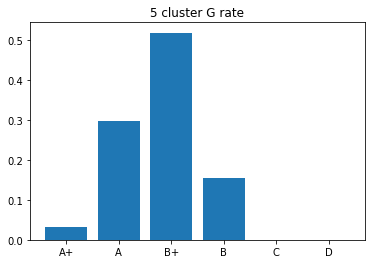

In [122]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_5[cluster_5['지배구조']==1])/253,
               len(cluster_5[cluster_5['지배구조']==0])/253,
               len(cluster_5[cluster_5['지배구조']==3])/253,
               len(cluster_5[cluster_5['지배구조']==2])/253,
               len(cluster_5[cluster_5['지배구조']==4])/253,
               len(cluster_5[cluster_5['지배구조']==5])/253]

plt.bar(group_names, values0)
plt.title("5 cluster G rate")

plt.savefig('g5.png')

plt.show()

# train test split 클러스터링

In [75]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
kp.fit_predict(train, categorical=[20,21,22,23,24,25,26,27])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 485, ncost: 458.8900685459076
Run: 1, iteration: 2/100, moves: 162, ncost: 453.4432873973497
Run: 1, iteration: 3/100, moves: 89, ncost: 451.9222541551843
Run: 1, iteration: 4/100, moves: 50, ncost: 450.3267974375614
Run: 1, iteration: 5/100, moves: 33, ncost: 449.7639996770011
Run: 1, iteration: 6/100, moves: 18, ncost: 449.283821647124
Run: 1, iteration: 7/100, moves: 9, ncost: 449.2035657475619
Run: 1, iteration: 8/100, moves: 4, ncost: 449.19888233163834
Run: 1, iteration: 9/100, moves: 0, ncost: 449.19888233163834


array([3, 1, 1, ..., 1, 3, 4], dtype=uint16)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
np_arr = np.concatenate((train, kp.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
df2 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster"]) # 마지막 column name is cluster

df2[['ESG등급', '환경', '사회', '지배구조',"cluster"]] = df2[['ESG등급', '환경', '사회', '지배구조',"cluster"]].astype(object)
px.scatter(df2 , x="매출액",y="자산총계",color="ESG등급",symbol="cluster",width=700,height=700)

In [77]:
df2.groupby('cluster')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster,cluster별 최빈값,cluster별 데이터 수
0,0.0,1.0,75
1,1.0,1.0,229
2,2.0,2.0,172
3,3.0,4.0,208
4,4.0,5.0,242
5,5.0,3.0,284


In [78]:
cluster_0_train = df2[df2['cluster'] == 0.0]
cluster_1_train = df2[df2['cluster'] == 1.0]
cluster_2_train = df2[df2['cluster'] == 2.0]
cluster_3_train = df2[df2['cluster'] == 3.0]
cluster_4_train = df2[df2['cluster'] == 4.0]
cluster_5_train = df2[df2['cluster'] == 5.0]

In [79]:
print('1: \n',cluster_0_train['ESG등급'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_1_train['ESG등급'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_2_train['ESG등급'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3_train['ESG등급'].value_counts(normalize=True))  # n=3 or n=4
print('5: \n',cluster_4_train['ESG등급'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5_train['ESG등급'].value_counts(normalize=True))  # n=2

1: 
 1.0    0.706667
0.0    0.213333
3.0    0.080000
Name: ESG등급, dtype: float64
2: 
 1.0    0.628821
0.0    0.362445
2.0    0.004367
3.0    0.004367
Name: ESG등급, dtype: float64
3: 
 2.0    0.523256
3.0    0.145349
4.0    0.133721
0.0    0.104651
5.0    0.093023
Name: ESG등급, dtype: float64
4: 
 4.0    0.600962
2.0    0.197115
0.0    0.100962
5.0    0.081731
3.0    0.019231
Name: ESG등급, dtype: float64
5: 
 5.0    0.690083
4.0    0.185950
2.0    0.090909
3.0    0.028926
0.0    0.004132
Name: ESG등급, dtype: float64
6: 
 3.0    0.573944
0.0    0.228873
2.0    0.183099
4.0    0.014085
Name: ESG등급, dtype: float64


In [80]:
test_label = kp.fit_predict(test, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 106, ncost: 319.34038747074754
Run: 1, iteration: 2/100, moves: 1, ncost: 319.3280497714137
Run: 1, iteration: 3/100, moves: 0, ncost: 319.3280497714137


In [81]:
test_label = pd.DataFrame(test_label)
test_label

,0
0,0
1,2
2,4
3,1
4,4
...,...
591,0
592,1
593,4
594,4


In [82]:
test_y = test_y.reset_index(drop=True)
effect = pd.concat([test_label, test_y], axis = 1)

In [83]:
effect = effect.rename(columns={0:'예상군집'})

In [84]:
effect["1순위등급"] = effect["예상군집"] * 0
effect

,예상군집,ESG등급,1순위등급
0,0,3,0
1,2,3,0
2,4,2,0
3,1,1,0
4,4,1,0
...,...,...,...
591,0,5,0
592,1,3,0
593,4,2,0
594,4,4,0


In [85]:
effect['1순위등급'][effect['예상군집'] == 0] = 1
effect['1순위등급'][effect['예상군집'] == 1] = 1
effect['1순위등급'][effect['예상군집'] == 2] = 2
effect['1순위등급'][effect['예상군집'] == 3] = 4
effect['1순위등급'][effect['예상군집'] == 4] = 5
effect['1순위등급'][effect['예상군집'] == 5] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

In [86]:
effect

,예상군집,ESG등급,1순위등급
0,0,3,1
1,2,3,2
2,4,2,5
3,1,1,1
4,4,1,5
...,...,...,...
591,0,5,1
592,1,3,1
593,4,2,5
594,4,4,5


In [87]:
effect["예측력"] = effect["예상군집"] * 0

effect["예측력"][effect["ESG등급"]==effect["1순위등급"]]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
effect["예측력"].sum()

99

In [89]:
effect["예측력"].sum() / 596

0.16610738255033558

# 환경, 사회, 지배구조를 포함한 클러스터링

In [ ]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
kp.fit_predict(train_x, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 518, ncost: 417.1125297481799
Run: 1, iteration: 2/100, moves: 137, ncost: 413.67533000527806
Run: 1, iteration: 3/100, moves: 65, ncost: 412.0740447399004
Run: 1, iteration: 4/100, moves: 39, ncost: 410.80933491195566
Run: 1, iteration: 5/100, moves: 14, ncost: 410.67643274418606
Run: 1, iteration: 6/100, moves: 3, ncost: 410.67069182013455
Run: 1, iteration: 7/100, moves: 0, ncost: 410.67069182013455


array([3, 5, 3, ..., 0, 5, 3], dtype=uint16)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
np_arr = np.concatenate((train_x, train_y, kp.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
df = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster"]) # 마지막 column name is cluster

df[['ESG등급', '환경', '사회', '지배구조',"cluster"]] = df[['ESG등급', '환경', '사회', '지배구조',"cluster"]].astype(object)
px.scatter(df , x="매출액",y="자산총계",color="ESG등급",symbol="cluster",width=700,height=700)

In [ ]:
df.groupby('cluster')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster,cluster별 최빈값,cluster별 데이터 수
0,0.0,5.0,308
1,1.0,1.0,83
2,2.0,0.0,268
3,3.0,3.0,233
4,4.0,1.0,65
5,5.0,4.0,253


In [ ]:
cluster_0 = df[df['cluster'] == 0.0]
cluster_1 = df[df['cluster'] == 1.0]
cluster_2 = df[df['cluster'] == 2.0]
cluster_3 = df[df['cluster'] == 3.0]
cluster_4 = df[df['cluster'] == 4.0]
cluster_5 = df[df['cluster'] == 5.0]

In [ ]:
print('1: \n',cluster_0['ESG등급'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_1['ESG등급'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_2['ESG등급'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3['ESG등급'].value_counts(normalize=True))  # n=3 or n=4
print('5: \n',cluster_4['ESG등급'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5['ESG등급'].value_counts(normalize=True))  # n=2

1: 
 5.0    0.444805
2.0    0.233766
4.0    0.207792
3.0    0.113636
Name: ESG등급, dtype: float64
2: 
 1.0    0.819277
0.0    0.096386
3.0    0.060241
4.0    0.012048
2.0    0.012048
Name: ESG등급, dtype: float64
3: 
 0.0    0.503731
1.0    0.294776
3.0    0.152985
2.0    0.029851
4.0    0.014925
5.0    0.003731
Name: ESG등급, dtype: float64
4: 
 3.0    0.407725
0.0    0.257511
2.0    0.227468
4.0    0.107296
Name: ESG등급, dtype: float64
5: 
 1.0    0.815385
0.0    0.123077
3.0    0.061538
Name: ESG등급, dtype: float64
6: 
 4.0    0.450593
5.0    0.292490
2.0    0.201581
3.0    0.031621
0.0    0.019763
1.0    0.003953
Name: ESG등급, dtype: float64


In [ ]:
# 클러스터별 업종 분포
print('1: \n', cluster_0['업종'].value_counts(normalize=True))  # 1st 5%
print('2: \n', cluster_1['업종'].value_counts(normalize=True))  # 1st 39%
print('3: \n', cluster_2['업종'].value_counts(normalize=True))  # 1st 71%
print('4: \n', cluster_3['업종'].value_counts(normalize=True))  # 1st 5%
print('5: \n', cluster_4['업종'].value_counts(normalize=True))  # 1st 7%
print('6: \n', cluster_5['업종'].value_counts(normalize=True))  # 1st 10%

1: 
 67.0     0.051948
108.0    0.038961
91.0     0.035714
94.0     0.035714
51.0     0.029221
           ...   
74.0     0.003247
64.0     0.003247
106.0    0.003247
55.0     0.003247
75.0     0.003247
Name: 업종, Length: 99, dtype: float64
2: 
 64.0     0.180723
87.0     0.036145
3.0      0.036145
67.0     0.036145
16.0     0.036145
65.0     0.024096
68.0     0.024096
56.0     0.024096
35.0     0.024096
0.0      0.024096
69.0     0.024096
24.0     0.024096
58.0     0.024096
22.0     0.024096
8.0      0.024096
46.0     0.012048
73.0     0.012048
27.0     0.012048
79.0     0.012048
30.0     0.012048
50.0     0.012048
129.0    0.012048
61.0     0.012048
34.0     0.012048
39.0     0.012048
9.0      0.012048
75.0     0.012048
4.0      0.012048
96.0     0.012048
28.0     0.012048
91.0     0.012048
26.0     0.012048
59.0     0.012048
99.0     0.012048
125.0    0.012048
40.0     0.012048
84.0     0.012048
93.0     0.012048
18.0     0.012048
55.0     0.012048
81.0     0.012048
80.0     0.012048

### test 셋 넣어보기

In [ ]:
test_label = kp.fit_predict(test, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 174, ncost: 225.70449133642785
Run: 1, iteration: 2/100, moves: 77, ncost: 221.7057177598512
Run: 1, iteration: 3/100, moves: 60, ncost: 221.13897089489916
Run: 1, iteration: 4/100, moves: 4, ncost: 221.1130391201677
Run: 1, iteration: 5/100, moves: 2, ncost: 221.11109915446616
Run: 1, iteration: 6/100, moves: 0, ncost: 221.11109915446616


In [ ]:
test_label = pd.DataFrame(test_label)
test_label

,0
0,2
1,4
2,4
3,1
4,5
...,...
591,2
592,0
593,0
594,2


In [ ]:
test_y = test_y.reset_index(drop=True)
effect = pd.concat([test_label, test_y], axis = 1)

In [ ]:
effect = effect.rename(columns={0:'예상군집'})

In [ ]:
effect["1순위등급"] = effect["예상군집"] * 0
effect

,예상군집,ESG등급,1순위등급
0,2,3,0
1,4,3,0
2,4,2,0
3,1,1,0
4,5,1,0
...,...,...,...
591,2,5,0
592,0,3,0
593,0,2,0
594,2,4,0


In [ ]:
effect['1순위등급'][effect['예상군집'] == 0] = 0
effect['1순위등급'][effect['예상군집'] == 1] = 1
effect['1순위등급'][effect['예상군집'] == 2] = 2
effect['1순위등급'][effect['예상군집'] == 3] = 3
effect['1순위등급'][effect['예상군집'] == 4] = 4
effect['1순위등급'][effect['예상군집'] == 5] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

In [ ]:
effect["2순위등급"] = effect["예상군집"] * 0

effect['2순위등급'][effect['예상군집'] == 0] = 0
effect['2순위등급'][effect['예상군집'] == 1] = 1
effect['2순위등급'][effect['예상군집'] == 2] = 2
effect['2순위등급'][effect['예상군집'] == 3] = 3
effect['2순위등급'][effect['예상군집'] == 4] = 4
effect['2순위등급'][effect['예상군집'] == 5] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

In [ ]:
effect["3순위등급"] = effect["예상군집"] * 0

effect['3순위등급'][effect['예상군집'] == 0] = 0
effect['3순위등급'][effect['예상군집'] == 1] = 1
effect['3순위등급'][effect['예상군집'] == 2] = 2
effect['3순위등급'][effect['예상군집'] == 3] = 3
effect['3순위등급'][effect['예상군집'] == 4] = 4
effect['3순위등급'][effect['예상군집'] == 5] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

In [ ]:
effect["예측력"] = effect["예상군집"] * 0

effect["예측력"][effect["ESG등급"]==effect["1순위등급"]]=1
effect["예측력"][effect["ESG등급"]==effect["2순위등급"]]=0.8
effect["예측력"][effect["ESG등급"]==effect["3순위등급"]]=0.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
effect["예측력"].sum() / 596  # 정확도

0.0936241610738255

In [ ]:
effect["예측력"].sum()

55.8

In [ ]:
# 클러스터별 통계량
df_features = df.groupby('cluster').aggregate([min, np.median, max])

In [ ]:
#df_features.to_csv('cluster_info.csv', encoding='utf-8')

### 클러스터링 속 클러스터링

01: A+ A / 
23: B+ B / 
45: C  D


In [ ]:
cluster_0.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조', 'ESG등급', 'cluster'],
      dtype='object')

In [ ]:
cluster_x_0 = cluster_0[['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조']]

In [ ]:
# cluster_0 n=2
kp0 = KPrototypes(n_clusters=2, init='cao', n_init=1, verbose=True)
kp0.fit_predict(cluster_x_0, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 112, ncost: 105.57164067225654
Run: 1, iteration: 2/100, moves: 57, ncost: 103.85948423967028
Run: 1, iteration: 3/100, moves: 8, ncost: 103.85154493426973
Run: 1, iteration: 4/100, moves: 0, ncost: 103.85154493426973


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
np_arr = np.concatenate((cluster_0, kp0.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_0 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_0']) # 마지막 column name is cluster_0

cluster_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0']] = cluster_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0']].astype(object)
cluster_0.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_0
0,0.003397,0.055074,0.0034,0.012056,0.001341,0.005449,0.000247,0.00209,0.000069,0.0,...,321.0,100.0,8.0,0.0,5.0,4.0,3.0,4.0,0.0,0
1,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.00146,0.00092,0.00039,...,719.0,67.0,8.0,0.0,5.0,4.0,3.0,2.0,0.0,0
2,0.001342,0.089947,0.003003,0.004951,0.000551,0.002109,0.015776,0.024129,0.020835,0.02557,...,452.0,97.0,10.0,1.0,5.0,2.0,3.0,2.0,0.0,0
3,0.00097,0.321076,0.004001,0.003467,0.000839,0.002893,0.082015,0.196852,0.016886,0.005465,...,721.0,23.0,8.0,0.0,5.0,3.0,4.0,4.0,0.0,0
4,0.002546,0.150802,0.001243,0.006117,0.015149,0.022494,0.001593,0.001546,0.00173,0.001668,...,684.0,2.0,1.0,1.0,5.0,4.0,3.0,4.0,0.0,0


In [ ]:
cluster_0_0 = cluster_0[cluster_0['cluster_0'] == 0.0]
cluster_0_1 = cluster_0[cluster_0['cluster_0'] == 1.0]
#cluster_0_2 = cluster_0[cluster_0['cluster_0'] == 2.0]
#cluster_0_3 = cluster_0[cluster_0['cluster_0'] == 3.0]

In [ ]:
cluster_0.groupby('cluster_0')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_0,cluster별 최빈값,cluster별 데이터 수
0,0,5.0,251
1,1,5.0,140


In [ ]:
print(cluster_0_0['ESG등급'].value_counts(normalize=True))  
print(cluster_0_1['ESG등급'].value_counts(normalize=True))
#print(cluster_0_2['ESG등급'].value_counts(normalize=True))
#print(cluster_0_3['ESG등급'].value_counts(normalize=True))

5.0    0.430279
2.0    0.262948
4.0    0.203187
3.0    0.103586
Name: ESG등급, dtype: float64
5.0    0.300000
2.0    0.250000
4.0    0.214286
3.0    0.192857
0.0    0.042857
Name: ESG등급, dtype: float64


클러스터 소분류 할 때 재무적 요소(기업 규모)와 비재무적 요소(ESG 평가 항목)을 나눠서 생각해보자

In [ ]:
cluster_0.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조', 'ESG등급', 'cluster', 'cluster_0'],
      dtype='object')

In [ ]:
cluster_0_fi = cluster_0[['상장주식수', '등락률', '거래량_x', '거래대금_x', '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '상장기간', '시장구분']]

In [ ]:
cluster_0_nonfi = cluster_0[['온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)','온실가스/매출액','총개수','업종', '지역']]

In [ ]:
kp0_fi = KPrototypes(n_clusters=3, init='cao', n_init=1, verbose=True)
kp0_fi.fit_predict(cluster_0_fi, categorical=[16])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 148, ncost: 13.484060299951386
Run: 1, iteration: 2/100, moves: 29, ncost: 13.399627828202163
Run: 1, iteration: 3/100, moves: 4, ncost: 13.397570221596718
Run: 1, iteration: 4/100, moves: 0, ncost: 13.397570221596718


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
np_arr = np.concatenate((cluster_0, kp0_fi.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기

cluster_0 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급', "cluster", 'cluster_0','cluster_0 fi'])

cluster_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0','cluster_0 fi']] = cluster_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0','cluster_0 fi']].astype(object)
cluster_0.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_0,cluster_0 fi
0,0.003397,0.055074,0.0034,0.012056,0.001341,0.005449,0.000247,0.00209,0.000069,0.0,...,100.0,8.0,0.0,5.0,4.0,3.0,4.0,0.0,1,2
1,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.00146,0.00092,0.00039,...,67.0,8.0,0.0,5.0,4.0,3.0,2.0,0.0,0,2
2,0.001342,0.089947,0.003003,0.004951,0.000551,0.002109,0.015776,0.024129,0.020835,0.02557,...,97.0,10.0,1.0,5.0,2.0,3.0,2.0,0.0,0,2
3,0.00097,0.321076,0.004001,0.003467,0.000839,0.002893,0.082015,0.196852,0.016886,0.005465,...,23.0,8.0,0.0,5.0,3.0,4.0,4.0,0.0,1,2
4,0.003775,0.138176,0.001018,0.002645,0.004617,0.012793,0.001554,0.00239,0.001316,0.002446,...,108.0,16.0,0.0,3.0,0.0,3.0,3.0,0.0,0,2


In [ ]:
cluster_0_fi0 = cluster_0[cluster_0['cluster_0 fi'] == 0.0]
cluster_0_fi1 = cluster_0[cluster_0['cluster_0 fi'] == 1.0]
cluster_0_fi2 = cluster_0[cluster_0['cluster_0 fi'] == 2.0]

In [ ]:
cluster_0.groupby('cluster_0 fi')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_0 fi,cluster별 최빈값,cluster별 데이터 수
0,0,5.0,208
1,1,5.0,16
2,2,2.0,243


In [ ]:
print(cluster_0_fi0['ESG등급'].value_counts(normalize=True))  
print(cluster_0_fi1['ESG등급'].value_counts(normalize=True))
print(cluster_0_fi2['ESG등급'].value_counts(normalize=True))  # 재무적 요소만으로 추가 분류가 잘 안된다 -> 어떻게 해석할지 생각해보기
# 결국 이미 평가되어있는 환경, 사회, 지배구조로 기업이 분리된 것이 아닐지?

5.0    0.562500
2.0    0.206731
4.0    0.153846
3.0    0.062500
0.0    0.014423
Name: ESG등급, dtype: float64
5.0    0.9375
4.0    0.0625
Name: ESG등급, dtype: float64
2.0    0.300412
4.0    0.292181
5.0    0.234568
3.0    0.164609
0.0    0.008230
Name: ESG등급, dtype: float64


비재무적 요소

In [ ]:
kp0_nfi = KPrototypes(n_clusters=3, init='cao', n_init=1, verbose=True)
kp0_nfi.fit_predict(cluster_0_nonfi, categorical=[4,5])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 62, ncost: 63.2090293418181
Run: 1, iteration: 2/100, moves: 44, ncost: 63.00153732384249
Run: 1, iteration: 3/100, moves: 5, ncost: 63.00029772793078
Run: 1, iteration: 4/100, moves: 0, ncost: 63.00029772793078


array([2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0,
       0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1,
       2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1,

In [ ]:
np_arr = np.concatenate((cluster_0, kp0_nfi.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기

cluster_0 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급', "cluster", 'cluster_0','cluster_0 fi', 'cluster_0 nonfi'])

cluster_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0','cluster_0 fi','cluster_0 nonfi']] = cluster_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0','cluster_0 fi','cluster_0 nonfi']].astype(object)
cluster_0.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_0,cluster_0 fi,cluster_0 nonfi
0,0.003397,0.055074,0.0034,0.012056,0.001341,0.005449,0.000247,0.00209,0.000069,0.0,...,8.0,0.0,5.0,4.0,3.0,4.0,0.0,1,2,2
1,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.00146,0.00092,0.00039,...,8.0,0.0,5.0,4.0,3.0,2.0,0.0,0,2,2
2,0.001342,0.089947,0.003003,0.004951,0.000551,0.002109,0.015776,0.024129,0.020835,0.02557,...,10.0,1.0,5.0,2.0,3.0,2.0,0.0,0,2,2
3,0.00097,0.321076,0.004001,0.003467,0.000839,0.002893,0.082015,0.196852,0.016886,0.005465,...,8.0,0.0,5.0,3.0,4.0,4.0,0.0,1,2,2
4,0.003775,0.138176,0.001018,0.002645,0.004617,0.012793,0.001554,0.00239,0.001316,0.002446,...,16.0,0.0,3.0,0.0,3.0,3.0,0.0,0,2,2


In [ ]:
cluster_0_nfi0 = cluster_0[cluster_0['cluster_0 nonfi'] == 0.0]
cluster_0_nfi1 = cluster_0[cluster_0['cluster_0 nonfi'] == 1.0]
cluster_0_nfi2 = cluster_0[cluster_0['cluster_0 nonfi'] == 2.0]

In [ ]:
cluster_0.groupby('cluster_0 nonfi')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_0 nonfi,cluster별 최빈값,cluster별 데이터 수
0,0,5.0,126
1,1,5.0,163
2,2,5.0,178


In [ ]:
print(cluster_0_nfi0['ESG등급'].value_counts(normalize=True))  
print(cluster_0_nfi1['ESG등급'].value_counts(normalize=True))
print(cluster_0_nfi2['ESG등급'].value_counts(normalize=True))  # 비재무적 요소로만으로 추가 분류가 잘 안된다 -> 어떻게 해석할지 생각해보기

5.0    0.365079
2.0    0.253968
3.0    0.206349
4.0    0.134921
0.0    0.039683
Name: ESG등급, dtype: float64
5.0    0.484663
4.0    0.233129
2.0    0.226994
3.0    0.055215
Name: ESG등급, dtype: float64
5.0    0.359551
4.0    0.275281
2.0    0.264045
3.0    0.101124
Name: ESG등급, dtype: float64


In [ ]:
# cluster_1 n=2
kp1 = KPrototypes(n_clusters=2, init='cao', n_init=1, verbose=True)
kp1.fit_predict(cluster_1, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 165.3139137215553


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [ ]:
np_arr = np.concatenate((cluster_1, kp1.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_1 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_1']) # 마지막 column name is cluster_1

In [ ]:
cluster_1[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_1']] = cluster_1[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_1']].astype(object)
cluster_1.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_1
0,0.121869,0.251936,0.039174,0.027667,0.001024,0.002944,0.060814,0.831552,0.108787,0.00005,...,577.0,30.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,0
1,0.002105,0.172444,0.008802,0.004411,0.000327,0.001317,0.122635,0.492491,0.132249,0.20516,...,273.0,98.0,1.0,1.0,2.0,4.0,3.0,2.0,1.0,1
2,0.029554,0.160653,0.00228,0.000566,0.000869,0.002328,0.110025,0.227925,0.011668,0.008964,...,340.0,53.0,8.0,1.0,4.0,1.0,3.0,3.0,1.0,1
3,0.032899,0.229418,0.006579,0.003,0.000835,0.002968,0.007545,0.226589,0.010434,0.000015,...,43.0,30.0,13.0,1.0,0.0,1.0,1.0,1.0,1.0,0
4,0.028236,0.205647,0.008943,0.00475,0.000835,0.002968,0.010075,0.19453,0.015108,0.00002,...,20.0,30.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0


In [ ]:
cluster_1_0 = cluster_1[cluster_1['cluster_1'] == 0.0]
cluster_1_1 = cluster_1[cluster_1['cluster_1'] == 1.0]

In [ ]:
cluster_1.groupby('cluster_1')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_1,cluster별 최빈값,cluster별 데이터 수
0,0,1.0,226
1,1,3.0,11


In [ ]:
print(cluster_1_0['ESG등급'].value_counts(normalize=True))  
print(cluster_1_1['ESG등급'].value_counts(normalize=True))
# (A A+) vs (B B+)로 잘 분리됨

1.0    0.858407
0.0    0.141593
Name: ESG등급, dtype: float64
3.0    0.727273
2.0    0.272727
Name: ESG등급, dtype: float64


In [ ]:
# cluster_2 n=2
kp2 = KPrototypes(n_clusters=2, init='cao', n_init=1, verbose=True)
kp2.fit_predict(cluster_2, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11, ncost: 87.85761848680586
Run: 1, iteration: 2/100, moves: 0, ncost: 87.85761848680586


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=uint16)

In [ ]:
np_arr = np.concatenate((cluster_2, kp2.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_2 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_2']) # 마지막 column name is cluster_2

cluster_2[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_2']] = cluster_2[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_2']].astype(object)
cluster_2.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_2
0,0.145402,0.151262,0.06645,0.013513,0.000869,0.002328,0.346307,1.0,0.061995,0.050355,...,874.0,53.0,8.0,1.0,1.0,1.0,3.0,0.0,2.0,1
1,0.12459,0.205084,0.023039,0.013787,0.000839,0.002893,1.0,0.96976,0.132337,0.039477,...,174.0,86.0,8.0,1.0,0.0,1.0,0.0,0.0,2.0,1
2,0.12186,0.143769,0.053579,0.371042,0.06199,0.210909,0.230704,0.84222,0.303926,0.208052,...,118.0,51.0,1.0,1.0,3.0,1.0,0.0,0.0,2.0,1
3,0.081827,0.274642,0.109732,0.22501,0.001638,0.004864,0.047694,0.562946,0.053144,0.06841,...,41.0,130.0,8.0,1.0,0.0,1.0,0.0,0.0,2.0,1
4,0.049661,0.172611,0.01047,0.007646,0.000839,0.002893,0.151537,0.370431,0.033304,0.010934,...,89.0,23.0,8.0,1.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
cluster_2_0 = cluster_2[cluster_2['cluster_2'] == 0.0]
cluster_2_1 = cluster_2[cluster_2['cluster_2'] == 1.0]
#cluster_2_2 = cluster_2[cluster_2['cluster_2'] == 2.0]

In [ ]:
cluster_2.groupby('cluster_2')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_2,cluster별 최빈값,cluster별 데이터 수
0,0,1.0,71
1,1,0.0,21


In [ ]:
print(cluster_2_0['ESG등급'].value_counts(normalize=True))  
print(cluster_2_1['ESG등급'].value_counts(normalize=True))
#print(cluster_2_2['ESG등급'].value_counts(normalize=True))

# A 등급 기업을 잘 골라낸다

1.0    0.887324
3.0    0.112676
Name: ESG등급, dtype: float64
0.0    1.0
Name: ESG등급, dtype: float64


In [ ]:
# cluster_3 n=4
kp3 = KPrototypes(n_clusters=4, init='cao', n_init=1, verbose=True)
kp3.fit_predict(cluster_3, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 129, ncost: 1065.9555983746523
Run: 1, iteration: 2/100, moves: 53, ncost: 1020.0692640854438
Run: 1, iteration: 3/100, moves: 22, ncost: 1015.1717839137416
Run: 1, iteration: 4/100, moves: 1, ncost: 1015.1628591685005
Run: 1, iteration: 5/100, moves: 0, ncost: 1015.1628591685005


array([3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 2, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 1, 3, 3,
       0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 2, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3, 1, 0, 3, 3, 1, 3,
       2, 2, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 1, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0,
       1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 1, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0,
       3, 0, 0, 1, 0, 0, 1, 3, 3, 0, 3, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 0, 0, 1, 0, 3, 3, 1, 2, 0, 3, 1, 0, 1, 3, 1, 1, 0,
       3, 0, 2, 1, 3, 3, 3, 0, 3, 1, 3, 0, 3, 0, 0, 3, 1, 0, 1, 1, 3, 0,
       0, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 0,

In [ ]:
np_arr = np.concatenate((cluster_3, kp3.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_3 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_3']) # 마지막 column name is cluster_3

cluster_3[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_3']] = cluster_3[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_3']].astype(object)
cluster_3.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_3
0,0.001881,0.213912,0.001656,0.000584,0.001242,0.004942,0.012341,0.017593,0.01354,0.014784,...,477.0,59.0,8.0,1.0,5.0,4.0,2.0,4.0,3.0,3
1,0.002591,0.110399,0.000838,0.00054,0.001242,0.004942,0.002252,0.009476,0.002442,0.00444,...,832.0,62.0,8.0,1.0,5.0,2.0,2.0,2.0,3.0,0
2,0.013523,0.102031,0.011477,0.001328,0.001242,0.004942,0.001105,0.004138,0.000731,0.001,...,579.0,24.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0,0
3,0.00258,0.217939,0.004415,0.002515,0.006778,0.020365,0.00937,0.01694,0.013867,0.01417,...,925.0,0.0,1.0,1.0,5.0,4.0,2.0,4.0,3.0,3
4,0.005119,0.055262,0.017033,0.004636,0.015149,0.022494,0.003626,0.013433,0.004895,0.006939,...,912.0,54.0,11.0,1.0,5.0,2.0,2.0,4.0,3.0,3


In [ ]:
cluster_3_0 = cluster_3[cluster_3['cluster_3'] == 0.0]
cluster_3_1 = cluster_3[cluster_3['cluster_3'] == 1.0]
cluster_3_2 = cluster_3[cluster_3['cluster_3'] == 2.0]
cluster_3_3 = cluster_3[cluster_3['cluster_3'] == 3.0]

In [ ]:
cluster_3.groupby('cluster_3')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_3,cluster별 최빈값,cluster별 데이터 수
0,0,2.0,145
1,1,3.0,63
2,2,5.0,112
3,3,4.0,176


In [ ]:
print(cluster_3_0['ESG등급'].value_counts(normalize=True))  
print(cluster_3_1['ESG등급'].value_counts(normalize=True))
print(cluster_3_2['ESG등급'].value_counts(normalize=True))
print(cluster_3_3['ESG등급'].value_counts(normalize=True))

2.0    0.813793
0.0    0.186207
Name: ESG등급, dtype: float64
3.0    0.904762
2.0    0.095238
Name: ESG등급, dtype: float64
5.0    1.0
Name: ESG등급, dtype: float64
4.0    1.0
Name: ESG등급, dtype: float64


In [ ]:
# cluster_4 n=4
kp4 = KPrototypes(n_clusters=4, init='cao', n_init=1, verbose=True)
kp4.fit_predict(cluster_4, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 30, ncost: 410.312585220264
Run: 1, iteration: 2/100, moves: 3, ncost: 408.8813830299169
Run: 1, iteration: 3/100, moves: 0, ncost: 408.8813830299169


array([3, 3, 0, 2, 2, 3, 0, 0, 2, 2, 3, 3, 3, 2, 0, 0, 0, 0, 2, 0, 3, 0,
       0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 3, 3, 0, 2,
       3, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 2, 0, 3, 3, 3, 0, 0, 3,
       2, 3, 0, 3, 2, 3, 0, 3, 3, 2, 0, 0, 0, 2, 3, 1, 3, 2, 0, 3, 1, 2,
       0, 2, 2, 2, 3, 0, 2, 2, 1, 3, 2, 3, 3, 3, 0, 0, 0, 2, 0, 0, 2, 3,
       2, 3, 0, 3, 0, 3, 2, 3, 0, 0, 3, 0, 0, 0, 3, 2, 2, 0, 0, 2, 3, 2,
       0, 2, 2, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=uint16)

In [ ]:
np_arr = np.concatenate((cluster_4, kp4.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_4 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_4']) # 마지막 column name is cluster_3

cluster_4[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_4']] = cluster_4[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_4']].astype(object)
cluster_4.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_4
0,0.004819,0.190183,0.003631,0.01086,0.001123,0.003644,0.00117,0.003109,0.00153,0.001511,...,94.0,126.0,16.0,1.0,3.0,2.0,3.0,3.0,4.0,3
1,0.002911,0.129244,0.003134,0.009055,0.015149,0.022494,0.001227,0.001797,0.001526,0.004093,...,554.0,79.0,8.0,1.0,4.0,2.0,2.0,4.0,4.0,3
2,0.001776,0.115679,0.001718,0.002711,0.000335,0.00133,0.022372,0.087233,0.029226,0.0216,...,898.0,51.0,1.0,1.0,0.0,1.0,3.0,0.0,4.0,0
3,0.006397,0.168145,0.002466,0.001482,0.002496,0.001708,0.004613,0.005299,0.003174,0.003262,...,659.0,55.0,8.0,1.0,4.0,2.0,3.0,2.0,4.0,2
4,0.005024,0.25613,0.006354,0.024959,0.004617,0.012793,0.000559,0.000639,0.000639,0.000673,...,458.0,108.0,13.0,1.0,5.0,2.0,3.0,2.0,4.0,2


In [ ]:
cluster_4_0 = cluster_4[cluster_4['cluster_4'] == 0.0]
cluster_4_1 = cluster_4[cluster_4['cluster_4'] == 1.0]
cluster_4_2 = cluster_4[cluster_4['cluster_4'] == 2.0]
cluster_4_3 = cluster_4[cluster_4['cluster_4'] == 3.0]

In [ ]:
cluster_4.groupby('cluster_4')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_4,cluster별 최빈값,cluster별 데이터 수
0,0,0.0,91
1,1,1.0,44
2,2,2.0,46
3,3,3.0,69


In [ ]:
print(cluster_4_0['ESG등급'].value_counts(normalize=True))  
print(cluster_4_1['ESG등급'].value_counts(normalize=True))
print(cluster_4_2['ESG등급'].value_counts(normalize=True))
print(cluster_4_3['ESG등급'].value_counts(normalize=True))

0.0    1.0
Name: ESG등급, dtype: float64
1.0    1.0
Name: ESG등급, dtype: float64
2.0    1.0
Name: ESG등급, dtype: float64
3.0    0.782609
4.0    0.217391
Name: ESG등급, dtype: float64


In [ ]:
# cluster_5 n=2
kp5 = KPrototypes(n_clusters=2, init='cao', n_init=1, verbose=True)
kp5.fit_predict(cluster_5, categorical=[20,21,22,23,24,25,26])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13, ncost: 585.170530531876
Run: 1, iteration: 2/100, moves: 0, ncost: 585.170530531876


array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint16)

In [ ]:
np_arr = np.concatenate((cluster_5, kp5.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_5 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_5']) # 마지막 column name is cluster_5

cluster_5[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_5']] = cluster_5[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_5']].astype(object)
cluster_5.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_5
0,0.031549,0.173487,0.016222,0.016954,0.004617,0.012793,0.010519,0.217303,0.011592,0.010461,...,877.0,108.0,3.0,1.0,3.0,0.0,0.0,0.0,5.0,1
1,0.010872,0.148319,0.012145,0.033945,0.000582,0.002375,0.002031,0.001612,0.002497,0.002312,...,288.0,107.0,13.0,1.0,2.0,0.0,0.0,3.0,5.0,0
2,0.002479,0.157856,0.00075,0.001679,0.001007,0.004099,0.001906,0.017459,0.002082,0.004569,...,306.0,118.0,8.0,1.0,0.0,0.0,0.0,0.0,5.0,1
3,0.008644,0.149822,0.005099,0.005978,0.002568,0.007249,0.001519,0.01175,0.000738,0.001238,...,695.0,128.0,8.0,1.0,4.0,0.0,0.0,3.0,5.0,0
4,0.000887,0.214392,0.001031,0.001624,0.004304,0.016045,0.092643,0.106042,0.033798,0.100149,...,139.0,78.0,10.0,1.0,3.0,0.0,0.0,0.0,5.0,1


In [ ]:
cluster_5_0 = cluster_5[cluster_5['cluster_5'] == 0.0]
cluster_5_1 = cluster_5[cluster_5['cluster_5'] == 1.0]

In [ ]:
cluster_5.groupby('cluster_5')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_5,cluster별 최빈값,cluster별 데이터 수
0,0,3.0,139
1,1,0.0,125


In [ ]:
print(cluster_5_0['ESG등급'].value_counts(normalize=True))  
print(cluster_5_1['ESG등급'].value_counts(normalize=True))

3.0    0.870504
2.0    0.086331
4.0    0.043165
Name: ESG등급, dtype: float64
0.0    1.0
Name: ESG등급, dtype: float64


# 환경, 사회, 지배구조를 제외한 클러스터링

In [ ]:
o_X.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,온실가스/매출액,상장기간,총개수,회사명,업종,지역,시장구분,환경,사회,지배구조
0,0.004819,0.190183,0.003631,0.010860,0.001123,0.003644,0.001170,0.003109,0.001530,0.001511,...,0.026214,0.000000,0.000000,94,126,16,1,3,2,3
1,0.002911,0.129244,0.003134,0.009055,0.015149,0.022494,0.001227,0.001797,0.001526,0.004093,...,0.000000,0.001423,0.000000,554,79,8,1,4,2,2
2,0.003397,0.055074,0.003400,0.012056,0.001341,0.005449,0.000247,0.002090,0.000069,0.000000,...,0.000000,0.025063,0.162637,321,100,8,0,5,4,3
3,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.001460,0.000920,0.000390,...,0.000000,0.025900,0.230769,719,67,8,0,5,4,3
4,0.001342,0.089947,0.003003,0.004951,0.000551,0.002109,0.015776,0.024129,0.020835,0.025570,...,0.001807,0.026067,0.243956,452,97,10,1,5,2,3


In [ ]:
o_y['환경'] = o_X['환경']
o_y['사회'] = o_X['사회']
o_y['지배구조'] = o_X['지배구조']

o_X = o_X.drop(['환경','사회','지배구조'], axis=1)

In [ ]:
o_y

,ESG등급,환경,사회,지배구조
0,3,3,2,3
1,4,4,2,2
2,4,5,4,3
3,2,5,4,3
4,2,5,2,3
...,...,...,...,...
1801,5,5,4,5
1802,5,5,4,4
1803,5,5,4,4
1804,5,3,4,5


In [ ]:
o_X.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분'],
      dtype='object')

In [ ]:
# train test set 분리
from sklearn.model_selection import train_test_split
train, test, train_y, test_y = train_test_split(o_X, o_y, test_size=0.33, random_state=321)



In [ ]:
test_y

,ESG등급,환경,사회,지배구조
851,3,2,3,3
1408,3,3,0,2
722,2,2,3,2
1313,1,0,1,1
1331,1,0,1,1
...,...,...,...,...
1657,5,5,4,4
59,3,5,2,0
374,2,5,2,3
816,4,5,4,2


In [ ]:
train

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,총개수,회사명,업종,지역,시장구분
1005,0.001819,0.202872,0.000514,0.002860,0.000663,0.001122,0.011221,0.009488,0.008429,0.021286,...,0.000500,0.001513,0.073754,0.000343,0.319246,0.281267,109,40,1,1
329,0.001985,0.092639,0.006004,0.001915,0.000273,0.001027,0.031466,0.040366,0.035638,0.035830,...,0.001719,0.000146,0.002968,0.000130,0.234854,0.000000,690,38,8,1
888,0.000004,0.221195,0.000012,0.000307,0.015149,0.022494,0.003626,0.013433,0.004895,0.006939,...,0.000045,0.000612,0.338120,0.000000,0.705858,0.076923,6,54,8,1
1697,0.003376,0.042792,0.005126,0.001072,0.000738,0.002802,0.020414,0.088863,0.019320,0.021035,...,0.004152,0.000217,0.002971,0.001323,0.480394,0.044850,449,70,9,1
1197,0.017928,0.167774,0.012101,0.063047,0.436980,0.436535,0.023076,0.114516,0.018024,0.097172,...,0.013592,0.036953,0.113709,0.019946,0.396556,0.356235,786,34,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,0.009654,0.174876,0.029396,0.018967,0.001997,0.002750,0.003006,0.004930,0.004053,0.003065,...,0.031541,0.009716,0.010271,0.000869,0.263721,0.407704,499,102,13,0
799,0.002026,0.446585,0.016926,0.019870,0.026848,0.031834,0.002026,0.006613,0.002335,0.002056,...,0.000808,0.000272,0.012155,0.504466,0.674310,0.000000,810,31,8,1
124,0.000951,0.429180,0.001192,0.009174,0.000294,0.001199,0.000830,0.000450,0.001027,0.001407,...,0.001717,0.008973,0.086208,0.000000,0.097071,0.307692,151,67,8,0
538,0.001575,0.168875,0.000000,0.000000,0.000551,0.002109,0.015776,0.024129,0.020835,0.025570,...,0.000000,0.000000,0.006427,0.001807,0.383598,0.076923,447,97,5,1


In [ ]:
from kmodes.kprototypes import KPrototypes
kp_new = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
kp_new.fit_predict(train, categorical=[20,21,22,23])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 387, ncost: 319.484975862701
Run: 1, iteration: 2/100, moves: 186, ncost: 315.0863909871061
Run: 1, iteration: 3/100, moves: 120, ncost: 309.8300622946808
Run: 1, iteration: 4/100, moves: 64, ncost: 306.1578215298846
Run: 1, iteration: 5/100, moves: 23, ncost: 305.3317357469613
Run: 1, iteration: 6/100, moves: 7, ncost: 305.3140166779948
Run: 1, iteration: 7/100, moves: 0, ncost: 305.3140166779948


array([1, 5, 3, ..., 5, 2, 4], dtype=uint16)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
np_arr = np.concatenate((train, train_y, kp_new.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
df_new = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       'ESG등급','환경', '사회', '지배구조',"cluster"]) # 마지막 column name is cluster

df_new[['ESG등급', '환경', '사회', '지배구조',"cluster"]] = df_new[['ESG등급', '환경', '사회', '지배구조',"cluster"]].astype(object)
px.scatter(df_new , x="매출액",y="자산총계",color="ESG등급",symbol="cluster",width=700,height=700)

In [ ]:
df_new.groupby('cluster')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster,cluster별 최빈값,cluster별 데이터 수
0,0.0,1.0,24
1,1.0,4.0,226
2,2.0,5.0,180
3,3.0,0.0,273
4,4.0,5.0,148
5,5.0,1.0,359


In [ ]:
cluster_n_0 = df_new[df_new['cluster'] == 0.0]
cluster_n_1 = df_new[df_new['cluster'] == 1.0]
cluster_n_2 = df_new[df_new['cluster'] == 2.0]
cluster_n_3 = df_new[df_new['cluster'] == 3.0]
cluster_n_4 = df_new[df_new['cluster'] == 4.0]
cluster_n_5 = df_new[df_new['cluster'] == 5.0]

In [ ]:
print('1: \n',cluster_n_0['ESG등급'].value_counts(normalize=True))  # n=4
print('2: \n',cluster_n_1['ESG등급'].value_counts(normalize=True))  # n=2
print('3: \n',cluster_n_2['ESG등급'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_n_3['ESG등급'].value_counts(normalize=True))  # n=4
print('5: \n',cluster_n_4['ESG등급'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_n_5['ESG등급'].value_counts(normalize=True))  # n=2

1: 
 1.0    0.916667
3.0    0.083333
Name: ESG등급, dtype: float64
2: 
 4.0    0.247788
5.0    0.234513
2.0    0.181416
0.0    0.172566
3.0    0.137168
1.0    0.026549
Name: ESG등급, dtype: float64
3: 
 5.0    0.355556
4.0    0.177778
2.0    0.155556
3.0    0.127778
1.0    0.122222
0.0    0.061111
Name: ESG등급, dtype: float64
4: 
 0.0    0.212454
1.0    0.183150
4.0    0.175824
5.0    0.153846
3.0    0.153846
2.0    0.120879
Name: ESG등급, dtype: float64
5: 
 5.0    0.202703
2.0    0.195946
3.0    0.189189
0.0    0.182432
4.0    0.141892
1.0    0.087838
Name: ESG등급, dtype: float64
6: 
 1.0    0.245125
0.0    0.225627
3.0    0.172702
2.0    0.150418
4.0    0.142061
5.0    0.064067
Name: ESG등급, dtype: float64


In [ ]:
# 클러스터별 업종 분포
print('1: \n', cluster_n_0['업종'].value_counts(normalize=True))  # 1st 4.4%
print('2: \n', cluster_n_1['업종'].value_counts(normalize=True))  # 1st 21%
print('3: \n', cluster_n_2['업종'].value_counts(normalize=True))  # 1st 26%
print('4: \n', cluster_n_3['업종'].value_counts(normalize=True))  # 1st 4.8%
print('5: \n', cluster_n_4['업종'].value_counts(normalize=True))  # 1st 14.9%
print('6: \n', cluster_n_5['업종'].value_counts(normalize=True))  # 1st 9%
# 환경, 사회, 지배구조를 포함했을 때보다 수치가 전반적으로 낮긴 함

1: 
 16.0     0.125000
12.0     0.083333
121.0    0.083333
13.0     0.083333
34.0     0.041667
43.0     0.041667
36.0     0.041667
60.0     0.041667
6.0      0.041667
61.0     0.041667
37.0     0.041667
1.0      0.041667
8.0      0.041667
9.0      0.041667
7.0      0.041667
11.0     0.041667
14.0     0.041667
71.0     0.041667
23.0     0.041667
Name: 업종, dtype: float64
2: 
 108.0    0.092920
122.0    0.066372
41.0     0.039823
38.0     0.035398
97.0     0.035398
           ...   
113.0    0.004425
110.0    0.004425
13.0     0.004425
99.0     0.004425
98.0     0.004425
Name: 업종, Length: 87, dtype: float64
3: 
 91.0    0.105556
97.0    0.066667
94.0    0.038889
35.0    0.027778
27.0    0.022222
          ...   
67.0    0.005556
24.0    0.005556
30.0    0.005556
22.0    0.005556
17.0    0.005556
Name: 업종, Length: 81, dtype: float64
4: 
 98.0     0.168498
30.0     0.084249
23.0     0.047619
97.0     0.029304
38.0     0.029304
           ...   
82.0     0.003663
104.0    0.003663
25.0     0

### test 셋 넣어보기

In [ ]:
test

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,총개수,회사명,업종,지역,시장구분
851,0.003238,0.117808,0.000576,0.000237,0.002395,0.009566,0.012261,0.013089,0.016019,0.010190,...,0.001183,0.000183,0.004538,0.014195,0.691046,0.230769,23,12,7,1
1408,0.004025,0.141585,0.001109,0.002810,0.004336,0.011967,0.001770,0.002562,0.001789,0.002619,...,0.001347,0.001645,0.031933,0.000000,0.058802,0.189004,511,109,14,0
722,0.004584,0.192562,0.011217,0.009489,0.003946,0.013364,0.014917,0.033313,0.017838,0.018796,...,0.013403,0.005719,0.009748,0.035893,0.508619,0.224852,624,27,8,1
1313,0.035583,0.205770,0.012395,0.006154,0.000835,0.002968,0.012064,0.245037,0.018342,0.000015,...,0.012312,0.003235,0.006365,0.000000,0.156289,0.169683,15,30,5,1
1331,0.034462,0.227730,0.007643,0.003489,0.000835,0.002968,0.008243,0.237332,0.011609,0.000014,...,0.010123,0.002511,0.005575,0.000000,0.125725,0.169683,40,30,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,0.009247,0.254350,0.008588,0.002114,0.000886,0.003506,0.004102,0.020304,0.004303,0.005259,...,0.001506,0.000369,0.004440,0.014395,0.342992,0.130168,420,116,2,0
59,0.025876,0.079763,0.012258,0.071666,0.000273,0.001027,0.009276,0.035436,0.010898,0.007359,...,0.016746,0.040260,0.075449,0.000000,0.061632,0.131054,457,38,11,0
374,0.001825,0.387357,0.002061,0.016882,0.000294,0.001199,0.000641,0.001051,0.000604,0.000936,...,0.000849,0.005151,0.096522,0.000000,0.269582,0.307692,512,67,1,0
816,0.000000,0.191247,0.000004,0.000043,0.002197,0.009141,0.005664,0.006903,0.006040,0.008618,...,0.000003,0.000019,0.150284,0.006767,0.682008,0.000000,678,35,1,1


In [ ]:
test_label = kp_new.fit_predict(test, categorical=[20,21,22,23])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 220, ncost: 164.65834897823547
Run: 1, iteration: 2/100, moves: 90, ncost: 161.79782593552224
Run: 1, iteration: 3/100, moves: 54, ncost: 159.77283222938513
Run: 1, iteration: 4/100, moves: 33, ncost: 158.5315537987981
Run: 1, iteration: 5/100, moves: 34, ncost: 157.0204239725935
Run: 1, iteration: 6/100, moves: 37, ncost: 156.6403503153967
Run: 1, iteration: 7/100, moves: 34, ncost: 155.89819313095504
Run: 1, iteration: 8/100, moves: 58, ncost: 151.50388904965334
Run: 1, iteration: 9/100, moves: 30, ncost: 149.50894540491095
Run: 1, iteration: 10/100, moves: 42, ncost: 149.32488023172175
Run: 1, iteration: 11/100, moves: 5, ncost: 149.31590148811944
Run: 1, iteration: 12/100, moves: 3, ncost: 149.31315292254266
Run: 1, iteration: 13/100, moves: 0, ncost: 149.31315292254266


In [ ]:
test_label = pd.DataFrame(test_label)
test_label

,0
0,3
1,4
2,3
3,5
4,5
...,...
591,4
592,4
593,4
594,3


In [ ]:
test_y = test_y.reset_index(drop=True)
effect = pd.concat([test_label, test_y], axis = 1)

In [ ]:
effect = effect.rename(columns={0:'예상군집'})

In [ ]:
effect["1순위등급"] = effect["예상군집"] * 0
effect

,예상군집,ESG등급,환경,사회,지배구조,1순위등급
0,3,3,2,3,3,0
1,4,3,3,0,2,0
2,3,2,2,3,2,0
3,5,1,0,1,1,0
4,5,1,0,1,1,0
...,...,...,...,...,...,...
591,4,5,5,4,4,0
592,4,3,5,2,0,0
593,4,2,5,2,3,0
594,3,4,5,4,2,0


In [ ]:
effect['1순위등급'][effect['예상군집'] == 0] = 0
effect['1순위등급'][effect['예상군집'] == 1] = 1
effect['1순위등급'][effect['예상군집'] == 2] = 2
effect['1순위등급'][effect['예상군집'] == 3] = 3
effect['1순위등급'][effect['예상군집'] == 4] = 4
effect['1순위등급'][effect['예상군집'] == 5] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

In [ ]:
effect["2순위등급"] = effect["예상군집"] * 0

effect['2순위등급'][effect['예상군집'] == 0] = 0
effect['2순위등급'][effect['예상군집'] == 1] = 1
effect['2순위등급'][effect['예상군집'] == 2] = 2
effect['2순위등급'][effect['예상군집'] == 3] = 3
effect['2순위등급'][effect['예상군집'] == 4] = 4
effect['2순위등급'][effect['예상군집'] == 5] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

In [ ]:
effect["3순위등급"] = effect["예상군집"] * 0

effect['3순위등급'][effect['예상군집'] == 0] = 0
effect['3순위등급'][effect['예상군집'] == 1] = 1
effect['3순위등급'][effect['예상군집'] == 2] = 2
effect['3순위등급'][effect['예상군집'] == 3] = 3
effect['3순위등급'][effect['예상군집'] == 4] = 4
effect['3순위등급'][effect['예상군집'] == 5] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

In [ ]:
effect["예측력"] = effect["예상군집"] * 0

In [ ]:
effect["예측력"] = effect["예상군집"] * 0

effect["예측력"][effect["ESG등급"]==effect["1순위등급"]]=1
effect["예측력"][effect["ESG등급"]==effect["2순위등급"]]=0.8
effect["예측력"][effect["ESG등급"]==effect["3순위등급"]]=0.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
effect

,예상군집,ESG등급,환경,사회,지배구조,1순위등급,2순위등급,3순위등급,예측력
0,3,3,2,3,3,3,3,3,0.6
1,4,3,3,0,2,4,4,4,0.0
2,3,2,2,3,2,3,3,3,0.0
3,5,1,0,1,1,5,5,5,0.0
4,5,1,0,1,1,5,5,5,0.0
...,...,...,...,...,...,...,...,...,...
591,4,5,5,4,4,4,4,4,0.0
592,4,3,5,2,0,4,4,4,0.0
593,4,2,5,2,3,4,4,4,0.0
594,3,4,5,4,2,3,3,3,0.0


In [ ]:
effect["예측력"].sum() / 596  # 정확도

0.11577181208053691

In [ ]:
effect["예측력"].sum()

69.0

### 클러스터링 속 클러스터링

In [ ]:
cluster_n_0.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', 'ESG등급', '환경', '사회', '지배구조', 'cluster'],
      dtype='object')

In [ ]:
cluster_kp_0 = cluster_n_0[['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분']]

In [ ]:
# cluster_0 n=4
kp_n0 = KPrototypes(n_clusters=4, init='cao', n_init=1, verbose=True)
kp_n0.fit_predict(cluster_kp_0, categorical=[20,21,22,23])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 123, ncost: 97.64627499015965
Run: 1, iteration: 2/100, moves: 76, ncost: 96.42863752702208
Run: 1, iteration: 3/100, moves: 22, ncost: 96.29840257843767
Run: 1, iteration: 4/100, moves: 11, ncost: 96.24344461742582
Run: 1, iteration: 5/100, moves: 13, ncost: 96.15574872280628
Run: 1, iteration: 6/100, moves: 70, ncost: 93.32716232056735
Run: 1, iteration: 7/100, moves: 22, ncost: 93.23925578655692
Run: 1, iteration: 8/100, moves: 2, ncost: 93.23721366509915
Run: 1, iteration: 9/100, moves: 0, ncost: 93.23721366509915


array([3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2,
       1, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 1, 1, 3, 1, 3, 1, 1, 2, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 2, 3, 2, 2, 3, 2, 3, 0,
       3, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3,
       1, 1, 2, 3, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 3, 3, 3, 1, 3, 2, 1, 1, 3,
       1, 3, 3, 2, 0, 1, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3, 0, 3, 2, 1, 3, 0,
       3, 2, 2, 0, 2, 3, 3, 1, 3, 2, 3, 2, 3, 0, 2, 2, 3, 2, 2, 0, 3, 2,
       2, 3, 0, 2, 3, 3, 2, 2, 0, 3, 3, 2, 0, 0, 3, 0, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 3, 0, 1, 3, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 3, 3, 3, 0, 0, 3, 0, 0, 1, 2, 0, 3, 1, 3, 1, 0, 0,
       1, 1, 3, 0, 0, 2, 0, 0, 0, 1, 2, 3, 0, 2, 0,

In [ ]:
np_arr = np.concatenate((cluster_n_0, kp_n0.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
cluster_n_0 = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster",'cluster_0']) # 마지막 column name is cluster_0

cluster_n_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0']] = cluster_n_0[['ESG등급', '환경', '사회', '지배구조',"cluster",'cluster_0']].astype(object)
cluster_n_0.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,회사명,업종,지역,시장구분,환경,사회,지배구조,ESG등급,cluster,cluster_0
0,0.003397,0.055074,0.0034,0.012056,0.001341,0.005449,0.000247,0.00209,0.000069,0.0,...,321.0,100.0,8.0,0.0,4.0,5.0,4.0,3.0,0.0,3
1,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.00146,0.00092,0.00039,...,719.0,67.0,8.0,0.0,2.0,5.0,4.0,3.0,0.0,3
2,0.001342,0.089947,0.003003,0.004951,0.000551,0.002109,0.015776,0.024129,0.020835,0.02557,...,452.0,97.0,10.0,1.0,2.0,5.0,2.0,3.0,0.0,1
3,0.00097,0.321076,0.004001,0.003467,0.000839,0.002893,0.082015,0.196852,0.016886,0.005465,...,721.0,23.0,8.0,0.0,4.0,5.0,3.0,4.0,0.0,3
4,0.003775,0.138176,0.001018,0.002645,0.004617,0.012793,0.001554,0.00239,0.001316,0.002446,...,510.0,108.0,16.0,0.0,3.0,3.0,0.0,3.0,0.0,3


In [ ]:
cluster_n_0_0 = cluster_n_0[cluster_n_0['cluster_0'] == 0.0]
cluster_n_0_1 = cluster_n_0[cluster_n_0['cluster_0'] == 1.0]
cluster_n_0_2 = cluster_n_0[cluster_n_0['cluster_0'] == 2.0]
cluster_n_0_3 = cluster_n_0[cluster_n_0['cluster_0'] == 3.0]

In [ ]:
cluster_n_0.groupby('cluster_0')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster_0,cluster별 최빈값,cluster별 데이터 수
0,0,4.0,141
1,1,3.0,92
2,2,3.0,93
3,3,3.0,141


In [ ]:
print(cluster_n_0_0['ESG등급'].value_counts(normalize=True))  
print(cluster_n_0_1['ESG등급'].value_counts(normalize=True))
print(cluster_n_0_2['ESG등급'].value_counts(normalize=True))
print(cluster_n_0_3['ESG등급'].value_counts(normalize=True))

4.0    0.446809
5.0    0.340426
2.0    0.106383
3.0    0.070922
0.0    0.021277
1.0    0.014184
Name: ESG등급, dtype: float64
3.0    0.565217
4.0    0.195652
2.0    0.163043
5.0    0.032609
0.0    0.021739
1.0    0.021739
Name: ESG등급, dtype: float64
3.0    0.419355
5.0    0.311828
2.0    0.139785
0.0    0.075269
4.0    0.053763
Name: ESG등급, dtype: float64
3.0    0.397163
4.0    0.304965
2.0    0.212766
5.0    0.042553
0.0    0.035461
1.0    0.007092
Name: ESG등급, dtype: float64
